In [92]:
import pandas as pd
import json

In [93]:
urop_path = '/home/gridsan/afogelson/osfm/scripts/urop_samples/uniform_sample/uniform_urop_sample_alex_labeled_PROMPT8.csv'
df = pd.read_csv(urop_path)

df['mcllm_binary_json'] = df['mcllm_binary'].copy()

In [94]:
def get_truth(r_):
    try:
        r = json.loads(r_.replace("'", "\""))
    except:
        return None
    
    if set(r.keys()) != {str(i) for i in range(1, 13)}:
        return None
    
    for key, item in r.items():
        r[key] = {'true': True, 'false': False}.get(item.lower())
    
    uses = r["4"] or r["5"] or r["6"] or r["9"] or r["10"] or r["11"] or r["12"]
    background = r["1"] or r["2"] or r["3"]

    if uses:
        return 'uses'
    
    if background:
        return 'background'

    return 'background'

df['mcllm_binary'] = df['mcllm_binary_json'].apply(get_truth)

print(set(df['mcllm_binary']))

for idx, row in df.iterrows():
    pass
    #print(row['multisentence'], row['mcllm_binary'], row['mcllm_binary_json'])

{None, 'background', 'uses'}


In [95]:
y_label, x_label = 'alex2', 'mcllm_binary'
df = df[~df[y_label].isna() & ~df[x_label].isna()]
df['urop'] = df['urop'].apply(str.lower)
df = df[df['urop'] != 'select']


"""df['mcllm_binary_stripped'] = df['mcllm_binary'].apply(lambda s: tuple(v.lstrip("('").rstrip("')") for v in s.split(","))[0])
df['mcllm_binary_stripped']
df = df[df['mcllm_binary_stripped'] != 'unclear']
x_label = 'mcllm_binary_stripped'"""

'df[\'mcllm_binary_stripped\'] = df[\'mcllm_binary\'].apply(lambda s: tuple(v.lstrip("(\'").rstrip("\')") for v in s.split(","))[0])\ndf[\'mcllm_binary_stripped\']\ndf = df[df[\'mcllm_binary_stripped\'] != \'unclear\']\nx_label = \'mcllm_binary_stripped\''

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(0)
train_size = 100
true, pred = np.random.permutation(df[y_label])[:train_size], np.random.permutation(df[x_label])[:train_size]

mapping = lambda s: {'background': 'context',
                     'future_work': 'context',
                    'differences': 'context',
                     'future work': 'context',
                     'motivation': 'context',
                     'similarities': 'context',
                     'extends': 'uses',
                     '*': 'context'
                     }.get(s) or s
true, pred = list(map(mapping, true)), list(map(mapping, pred))

cm = confusion_matrix(true, pred)

{'context', 'uses'} {'context', 'uses'}


Text(50.722222222222214, 0.5, 'alex2')

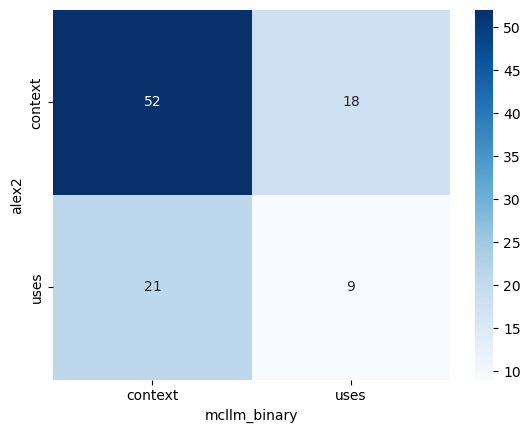

In [97]:
#assert(len(set(true)) == 3), set(true)
#assert(len(set(pred)) == 3), set(pred)
#labels = ['context', 'extends', 'uses']
print(set(true), set(pred))

labels = ['context', 'uses']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel(x_label)
plt.ylabel(y_label)

In [98]:
false_positives = (cm - cm * np.identity(len(labels))).sum(axis = 0)/cm.sum(axis = 0)
false_negatives = (cm - cm * np.identity(len(labels))).sum(axis = 1)/cm.sum(axis = 1)

print(false_positives)
print(false_negatives)

[0.28767123 0.66666667]
[0.25714286 0.7       ]


In [99]:
idx = 0

In [104]:
def get_examples(y_value, x_value):
    mask = (df[y_label].apply(mapping) == y_value) & (df[x_label].apply(mapping) == x_value) 
    return df[mask]

samples = get_examples(y_value='context', x_value = 'uses')
print(f"Drawing from {len(samples)} samples")
print(samples['modelKey'].iloc[idx])

print(samples['multisentence'].iloc[idx])
print(samples['mcllm_binary_json'].iloc[idx])
print(samples[y_label].iloc[idx])
print(samples[x_label].iloc[idx])
idx += 1

Drawing from 23 samples
521_roberta_large
these models take transformers (vaswani et al, 2017) as the backbone, and predict the next token based on previous tokens.1 prior to the widespread adoption of transformers, autoregressive language models were built on the backbones of n-grams (bickel et al, 2005; pauls and klein, 2011) and recurrent neural networks (mikolov et al, 2010), and have been applied to various nlg tasks such as summarization (nallapati et al, 2017) and dialogue generation (chen et al, 2017). footnote 1: another variant of language models predicts masked tokens in a corrupted sequence (devlin et al, 2019; <cite>liu et al, 2019</cite>; lan et al, 2019, _inter alia_). transformer-based llms have demonstrated exceptional performance across tasks, and have therefore shifted nlp from a paradigm centered on task-specific solutions to general-purpose pretraining (devlin et al, 2019; radford et al, 2019).
{'1': 'True', '2': 'True', '3': 'False', '4': 'False', '5': 'False', '6